<h1><center> DSAI 2201- Winter 2023- Assignment II </center></h1>
<h3><center> Due Date: 29 March 2023 </center></h3>
<h3><center> (50 points total) </center></h3>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment.

<font color='brown'> For all questions, make sure to provide the code as well as your comments on the results. Points are equally distributed between the code and the explainations provided for each of the results.

There will be an interview regarding your submission and your grade will be based on your performance during the interview.

Make sure this is your own work to get a grade. </font>

Below, please fill in your name and collaborators:

In [1]:
NAME = "Mary Villanueva"

## Introduction

In this assignment (Part II), you will apply supervised machine learning models on the same dataset (Pima-Indians-Diabetes-Data), evaluate its perofrmance, and identify the best models. 

Given a dataset of patients who had or did not have diabetes, you  need to build:

A) **Classification models** which can determine based on a given test dataset not containing the outcome (diabetes) data, whether a patient in the test dataset has diabetes or not.

B) **Regression models** which can determine based on a given test dataset not containing the outcome (glucose), what is the glucose measure for every patient.

<font color='brown'> For all questions, make sure to provide the code as well as your comments on the results. Points are equally distributed between the code and the explainations provided for each of the results.

There will be an interview regarding your submission and your grade will be based on your performance during the interview.

Make sure this is your own work to get a grade. </font>

Answer the following questions:

In [2]:
#LOAD ALL LIBRARIES

%matplotlib inline

import pandas as pd 

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
#LOAD DATAFRAME

df = pd.read_csv("diabetes_new.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,InsulinLevel,GlucoseLevel,BMILevel,GIProduct,DiabetesRisk,Outcome
0,6,148.0,72.0,35,30.0,33.6,0.6270,50,Normal,Hyperglycemic,Obese,4440.0,31.3500,1
1,1,85.0,66.0,29,30.0,26.6,0.3510,31,Normal,Normal,Overweight,2550.0,10.8810,0
2,8,183.0,64.0,23,30.0,23.3,0.6720,32,Normal,Hyperglycemic,Healthy,5490.0,21.5040,1
3,1,89.0,66.0,23,94.0,28.1,0.1670,21,Prediabetes,Normal,Overweight,8366.0,3.5070,0
4,0,137.0,40.0,35,168.0,43.1,0.3725,33,Diabetes,Hyperglycemic,Obese,23016.0,12.2925,1


In [4]:
#LIST ALL FEATURES AND THEIR DATATYPES

df.dtypes

Pregnancies        int64
Glucose          float64
BloodPressure    float64
SkinThickness      int64
Insulin          float64
BMI              float64
DPF              float64
Age                int64
InsulinLevel      object
GlucoseLevel      object
BMILevel          object
GIProduct        float64
DiabetesRisk     float64
Outcome            int64
dtype: object

In [5]:
#NORMALIZE DATA
cols = ['Outcome', 'InsulinLevel', 'GlucoseLevel', 'BMILevel']
df_copy = df.copy()

x = df_copy.loc[:, ~df_copy.columns.isin(cols)]

df_copy.loc[:, ~df_copy.columns.isin(cols)] = (x-x.min()) / (x.max()-x.min())

df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,InsulinLevel,GlucoseLevel,BMILevel,GIProduct,DiabetesRisk,Outcome
0,0.352941,0.670968,0.484848,0.500000,0.052632,0.484277,0.493261,0.483333,Normal,Hyperglycemic,Obese,0.061260,0.453037,1
1,0.058824,0.264516,0.393939,0.392857,0.052632,0.264151,0.245283,0.166667,Normal,Normal,Overweight,0.027406,0.140934,0
2,0.470588,0.896774,0.363636,0.285714,0.052632,0.160377,0.533693,0.183333,Normal,Hyperglycemic,Healthy,0.080067,0.302909,1
3,0.058824,0.290323,0.393939,0.285714,0.263158,0.311321,0.079964,0.000000,Prediabetes,Normal,Overweight,0.131583,0.028498,0
4,0.000000,0.600000,0.000000,0.500000,0.506579,0.783019,0.264600,0.200000,Diabetes,Hyperglycemic,Obese,0.393996,0.162456,1


## A. Classification Models (30 points)

**A.1. Data preparation**  _(5 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of having diabetes for a patient*).

* Divide your data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    

**A.2. Classification models**  _(15 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0

**A.3. Evaluation of classification models**  _(10 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?
* How can you improve the performance of the models?


### A.1. Data preparation

To determine which features are relevant for my models, I first need to check which variables have a close correlation with the outcome:

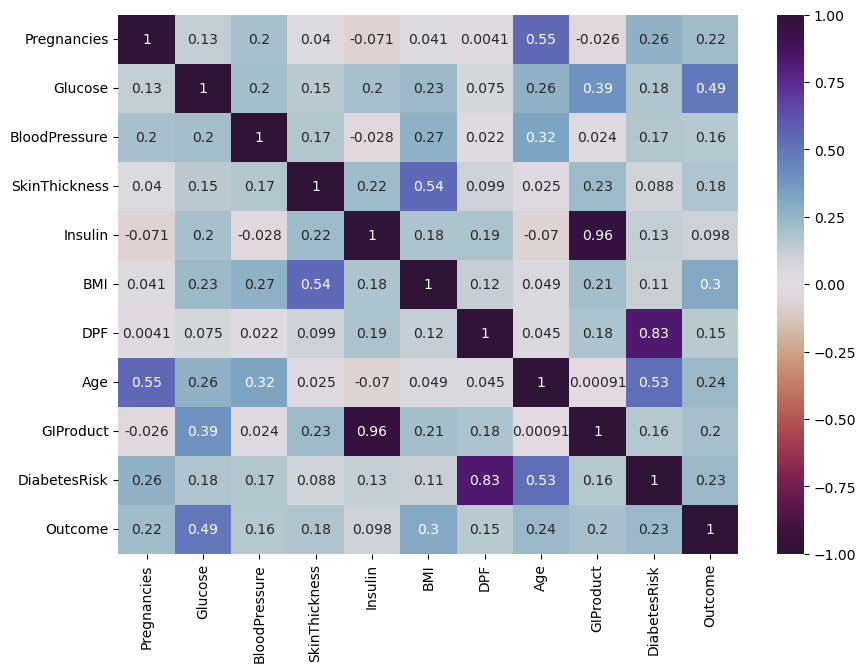

In [6]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = "twilight_shifted_r");

Although all columns have a positive correlation with the outcome, I will only be using the features with a correlation value >= 0.20 as my predictor variables. These features are: 
<ul>
    <li>Pregnancies</li>
    <li>Glucose</li>
    <li>BMI</li>
    <li>Age</li>
    <li>GIProduct</li>
    <li>DiabetesRisk</li>
</ul>

In [7]:
#SPLIT DATASET

predictors = df_copy[['Pregnancies', 'Glucose', 'BMI', 'Age', 'GIProduct', 'DiabetesRisk']] #predictor variables
target = df_copy['Outcome'] #target/class variable

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 123)

### A.2. Classification models

In [8]:
lr = LogisticRegression()
lrModel = lr.fit(predictors_train, target_train)

Since my dataset is quite small (<100k sample) and I am predicting a binary variable, **logistic regression** is an ideal model because it works well with binary classification tasks in small datasets.

In [9]:
svModel = svm.SVC(probability=True).fit(predictors_train, target_train)

**SVM** uses a small portion of the training dataset, called support vectors, to predict decisions. Therefore, SVM is memory-efficient. SVM also performs well when there are relatively less features than samples. For a binary classification problem such as this one, SVM works by finding a hyperplane that separates the data into the two classes.

In [10]:
nb = GaussianNB()
nbModel = nb.fit(predictors_train, target_train)

**Naive Bayes** is easy to implement and also functions well with small datasets. Its assumption of feature independence also means that this model is robust to noise and irrelevant features in the dataset. There is also less risk of overfitting, which is a common problem in small datasets.

### A.3. Evaluation

In [11]:
lrPred = lrModel.predict(predictors_test)

#METRICS
lrAcc = accuracy_score(target_test, lrPred)
lrPrec = precision_score(target_test, lrPred)
lrRec = recall_score(target_test, lrPred)

print("Logistic Regression Model Evaluation\n")
print("Accuracy: {:.3f}".format(lrAcc))
print("Precision: {:.3f}".format(lrPrec))
print("Recall: {:.3f}\n".format(lrRec))

Logistic Regression Model Evaluation

Accuracy: 0.741
Precision: 0.710
Recall: 0.557



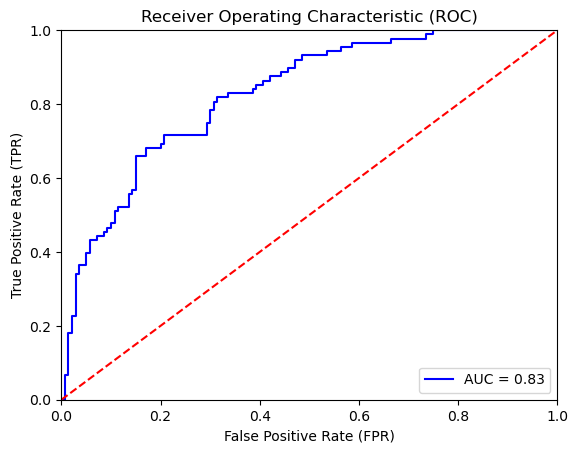

In [12]:
lrProb = lrModel.predict_proba(predictors_test)
lrFPR, lrTPR, lrThresh = roc_curve(target_test, lrProb[:,1])
lrAUC = auc(lrFPR, lrTPR)

plt.plot(lrFPR, lrTPR, 'b', label = 'AUC = %0.2f' % lrAUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [13]:
predProb = pd.DataFrame(lrProb)
predProb.columns = ['Diabetic', 'Non-diabetic']

predVal = pd.DataFrame(lrPred)
predVal.columns = ['Prediction']

actVal = pd.DataFrame(target_test)
actVal.columns = ['Actual Value']

predProb = predProb.reset_index(drop=True)
predVal = predVal.reset_index(drop=True)
actVal = actVal.reset_index(drop=True)
res = pd.concat([predProb, predVal, actVal], axis=1)
res.head()

,Diabetic,Non-diabetic,Prediction,Actual Value
0,0.754988,0.245012,0,1
1,0.567923,0.432077,0,1
2,0.881061,0.118939,0,0
3,0.497737,0.502263,1,1
4,0.835840,0.164160,0,0


In [14]:
svPred = svModel.predict(predictors_test)

#METRICS
svAcc = accuracy_score(target_test, svPred)
svPrec = precision_score(target_test, svPred)
svRec = recall_score(target_test, svPred)

print("SVM Model Evaluation\n")
print("Accuracy: {:.3f}".format(svAcc))
print("Precision: {:.3f}".format(svPrec))
print("Recall: {:.3f}\n".format(svRec))

#svPred

SVM Model Evaluation

Accuracy: 0.772
Precision: 0.781
Recall: 0.568



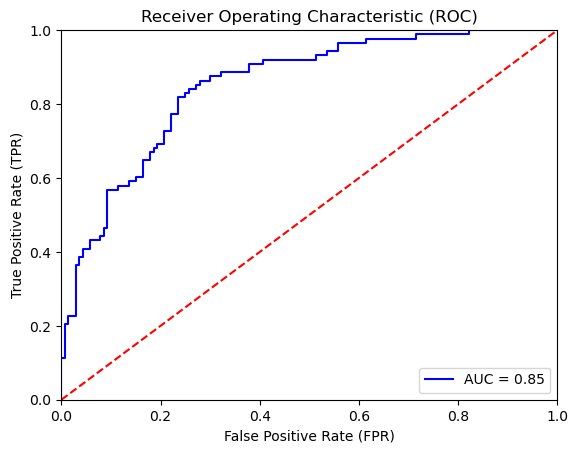

In [15]:
svProb = svModel.predict_proba(predictors_test)
svFPR, svTPR, svThresh = roc_curve(target_test, svProb[:,1])
svAUC = auc(svFPR, svTPR)

plt.plot(svFPR, svTPR, 'b', label = 'AUC = %0.2f' % svAUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [16]:
predProb = pd.DataFrame(svProb)
predProb.columns = ['Diabetic', 'Non-diabetic']

predVal = pd.DataFrame(svPred)
predVal.columns = ['Prediction']

actVal = pd.DataFrame(target_test)
actVal.columns = ['Actual Value']

predProb = predProb.reset_index(drop=True)
predVal = predVal.reset_index(drop=True)
actVal = actVal.reset_index(drop=True)
res = pd.concat([predProb, predVal, actVal], axis=1)
res.head()

,Diabetic,Non-diabetic,Prediction,Actual Value
0,0.849372,0.150628,0,1
1,0.561844,0.438156,0,1
2,0.868356,0.131644,0,0
3,0.445362,0.554638,1,1
4,0.866510,0.133490,0,0


In [17]:
nbPred = nbModel.predict(predictors_test)

#METRICS
nbAcc = accuracy_score(target_test, nbPred)
nbPrec = precision_score(target_test, nbPred)
nbRec = recall_score(target_test, nbPred)

print("Naive Bayes Model Evaluation\n")
print("Accuracy: {:.3f}".format(nbAcc))
print("Precision: {:.3f}".format(nbPrec))
print("Recall: {:.3f}\n".format(nbRec))

#nbPred

Naive Bayes Model Evaluation

Accuracy: 0.719
Precision: 0.658
Recall: 0.568



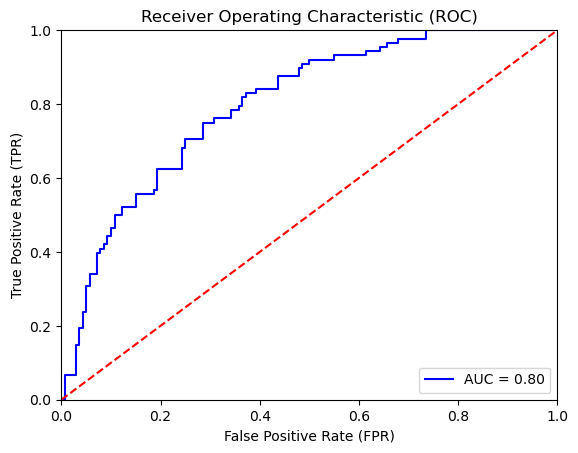

In [18]:
nbProb = nbModel.predict_proba(predictors_test)
nbFPR, nbTPR, nbThresh = roc_curve(target_test, nbProb[:,1])
nbAUC = auc(nbFPR, nbTPR)

plt.plot(nbFPR, nbTPR, 'b', label = 'AUC = %0.2f' % nbAUC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [19]:
predProb = pd.DataFrame(nbProb)
predProb.columns = ['Diabetic', 'Non-diabetic']

predVal = pd.DataFrame(nbPred)
predVal.columns = ['Prediction']

actVal = pd.DataFrame(target_test)
actVal.columns = ['Actual Value']

predProb = predProb.reset_index(drop=True)
predVal = predVal.reset_index(drop=True)
actVal = actVal.reset_index(drop=True)
res = pd.concat([predProb, predVal, actVal], axis=1)
res.head()

,Diabetic,Non-diabetic,Prediction,Actual Value
0,0.782239,0.217761,0,1
1,0.691229,0.308771,0,1
2,0.980486,0.019514,0,0
3,0.488894,0.511106,1,1
4,0.943994,0.056006,0,0


**Best model**
<p>When determining whether a patient has diabetes or not, we dont want to have more false negatives than false positives. In this case, the best model should have the highest <b>recall</b> score. A high recall score indicates that the model is good at identifying most positive cases.</p>

<p>Both <b>SVM</b> and <b>Naive Bayes</b> have the same recall score of 0.568. The next metric to consider is <b>AUC</b>, since it is a safer metric to measure model performance. Accuracy scores can be misleading if the classes are imbalanced (more negative cases than positive case or vice versa). Between SVM and Naive Bayes, SVM has a higher AUC score of 0.850. An AUC score closer to 1 suggests that the model is able to differentiate positive and negative classes.</p>

<p>Therefore, the <b>SVM</b> model best fits this classification model.</p>

**Model improvement**
<ol>
    <li>Populating the dataset with more samples can improve the model's accuracy. By adding more observations, we will be able to fine tune the model; predicting from a dataset with only 1k samples is not as productive as predicting from a dataset with 50k samples.</li>
    <li>Feature engineering can also improve my models. Although I have already made a few features, I think the classification models can be further improved with more categorical and numerical features.</li>
    <li>Implementing complex/more advanced data cleaning methods can also make my model less sensitive to outliers/bad data. My initial models did not have good performance, so I deviated from the dataset I cleaned in the previous assignment and did a different method of dealing with the outliers. This was one way to increase the quality of my models.</li>
    <li>To also avoid overfitting/underfitting, cross-validation can be done by creating multiple training and testing sets.</li>
</ol>

## B. Regression Models (20 points)

**B.1. Data preparation**  _(5 points)_
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the glucose measures of the patients*).

* Divide your data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    
**B.2. Regression models**  _(10 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 

**B.3. Evaluation of regression models**  _(5 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?
* How can you improve the performance of the models?


### B.1. Data preparation

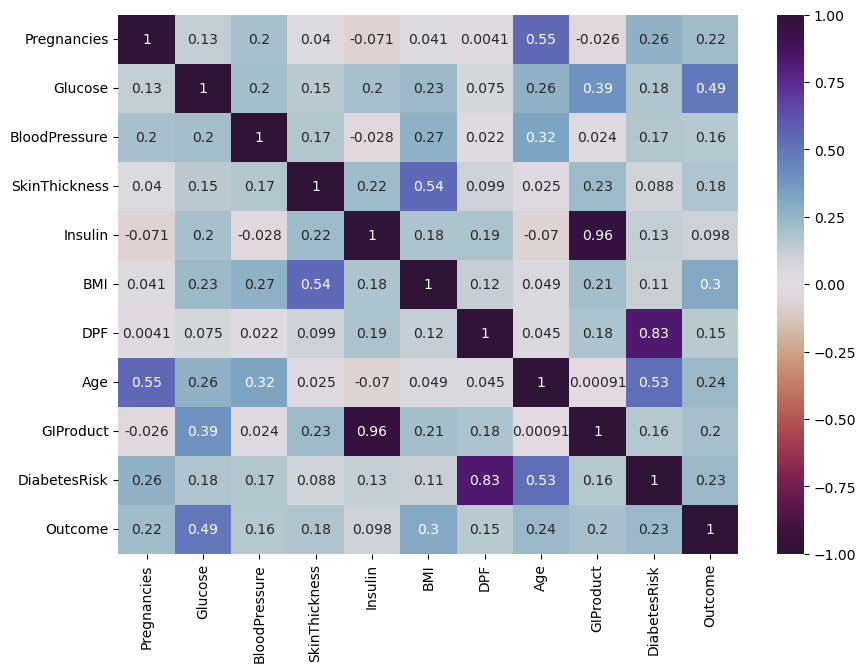

In [20]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = "twilight_shifted_r");

Although all variables have a positive correlation with the glucose, I excluded BMILevel, InsulinLevel, GlucoseLevel, DiabetesRisk, GIProduct, and Outcome because they are dependent variables. I also only picked the variables with a correlation >= 0.20 because having too much predictors might cause overfitting.

In [21]:
#SPLIT DATASET

predictors = df_copy[['BloodPressure','BMI','Insulin','Age']] #predictor variables
target = df_copy['Glucose'] #target/class variable

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 123)

### B.2. Regression models

In [22]:
ln = LinearRegression()
lnModel = ln.fit(predictors_train, target_train)

I picked **Linear regression** because it is commonly used in regression problems, and it is also simple to use. It has fast training and prediction speeds and work well with a small number of observations.

In [23]:
k = int(np.sqrt(df_copy.shape[0])) 

nn = KNeighborsRegressor(n_neighbors=k)
nnModel = nn.fit(predictors_train, target_train)

Similarly, **kNN** is another simple model fit for small datasets. The simplicity of these two models also prevent overfitting of data.

### B.3. Evaluation

In [24]:
lnPred = lnModel.predict(predictors_test)

#METRICS
lnR2 = r2_score(target_test, lnPred)
lnMSE = mean_squared_error(target_test, lnPred)
lnMAE = mean_absolute_error(target_test, lnPred)

print("Linear Regression Model Evaluation\n")
print("R2 score: {:.3f}".format(lnR2))
print("Mean squared error: {:.3f}".format(lnMSE))
print("Mean absolute error: {:.3f}\n".format(lnMAE))

#lnPred

Linear Regression Model Evaluation

R2 score: 0.161
Mean squared error: 0.031
Mean absolute error: 0.135



In [25]:
predVal = pd.DataFrame(lnPred)
predVal.columns = ['Prediction']

actVal = pd.DataFrame(target_test)
actVal.columns = ['Actual Value']

predVal = predVal.reset_index(drop=True)
actVal = actVal.reset_index(drop=True)
res = pd.concat([predVal, actVal], axis=1)
res.head()

,Prediction,Actual Value
0,0.482625,0.483871
1,0.455844,0.606452
2,0.469095,0.412903
3,0.485083,0.638710
4,0.497717,0.232258


In [26]:
nnPred = nnModel.predict(predictors_test)

#METRICS
nnR2 = r2_score(target_test, nnPred)
nnMSE = mean_squared_error(target_test, nnPred)
nnMAE = mean_absolute_error(target_test, nnPred)

print("kNN Regression Model Evaluation\n")
print("R2 score: {:.3f}".format(nnR2))
print("Mean squared error: {:.3f}".format(nnMSE))
print("Mean absolute error: {:.3f}\n".format(nnMAE))

#nnPred

kNN Regression Model Evaluation

R2 score: 0.136
Mean squared error: 0.032
Mean absolute error: 0.138



In [27]:
predVal = pd.DataFrame(nnPred)
predVal.columns = ['Prediction']

actVal = pd.DataFrame(target_test)
actVal.columns = ['Actual Value']

predVal = predVal.reset_index(drop=True)
actVal = actVal.reset_index(drop=True)
res = pd.concat([predVal, actVal], axis=1)
res.head()

,Prediction,Actual Value
0,0.535723,0.483871
1,0.484588,0.606452
2,0.533811,0.412903
3,0.504421,0.638710
4,0.550299,0.232258


**Best model**
<p>Both models are not a good fit for the data set because their R2 scores lie below 0.5. Since they also have almost identical MSE and MAE scores, I cannot effectively compare the two models and pick the best one.</p>

**Model improvement**
<ol>
    <li>Populating the dataset with more samples can improve the models' accuracy. By adding more observations, we will be able to fine tune the model; predicting from a dataset with only 1k samples is not as productive as predicting from a dataset with 50k samples.</li>
    <li>Feature engineering can also improve my models. In my regression models, I can improve their R2 scores by creating more numerical features that can contribute to a patient's glucose level. GIProduct is not a good feature for predicting the glucose levels because it depends on the glucose column.</li>
    <li>Implementing complex/more advanced data cleaning methods also helps by making the model less sensitive to outliers/bad data. My initial models did not have good performance, so I deviated from the dataset I cleaned in the previous assignment and did a different method of dealing with the outliers. This was one way to increase the quality of my models.</li>
    <li>To also avoid overfitting/underfitting, cross-validation can be done by creating multiple training and testing sets.</li>
</ol>